# ***深度学习入门：基于Python的理论和实践***

## ***第四章   神经网络的学习***

神经网络基于梯度下降算法处理损失函数，找出最优权重参数

### ***4.1  从数据中学习***

**神经网络具有成千上万个参数，对于参数的确定来源于神经网络对数据的学习。**<br>
**线性可分的问题能够通过有限次的学习解决，而不可线性可分的问题无法通过学习解决。**<br>
(线性可分指的是可以用一个线性函数把两种样本分开，非线性可分指有部分样本用线性分类面划分时会产生分类误差)

### **4.1.1  数据驱动**

以SVM、KNN等为代表的传统机器学习分类器需要人为的设计出特征向量(STIF、SURF、HOT）<br>
$\Rightarrow$$\Rightarrow$

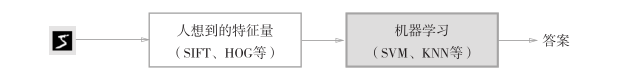

深度学习(端到端的机器学习)能够学习提供的数据，提取特征，无需人们设计特征向量。<br>如识别手写字体，用已知卷积核对feature map迭代，逐步提取特征。并且神经网络同样也能学习卷积核。<br>神经网络是一种端到端的框架$\Rightarrow$$\Rightarrow$

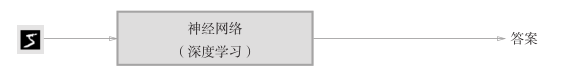

### **4.1.2 训练数据集和测试数据集**

将训练数据集(监督数据)和测试数据集是为了让神经网络具有更强的**泛化性**(训练较特殊的数据，预测更加一般性的数据)
<br>比如在高光谱遥感影像分类中神经网络学习带标签数据来预测未带标签的数据$\Rightarrow$$\Rightarrow$

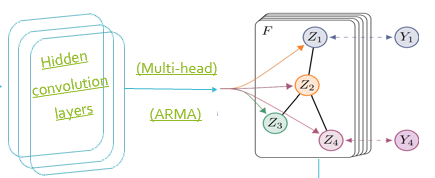

图模型经过卷积后得出特征图模型，如图中$Z_1$和$Z_4$是带标签的数据，来预测$Z_2$和$Z_3$的类别  $\Uparrow$$\Uparrow$$\Uparrow$<br>仅仅用一个数据集来学习和评价参数容易导致**过拟合**，即缺少泛化能力。可以采用$dropout$、$disout$等算法解决(使神经网络中的结点以一定概率停止工作)

### ***4.2  损失函数***

损失函数是用于来衡量神经网络对监督数据的拟合性能如**均方误差**和**交叉熵误差**

### **4.2.1  均方函数**

均方函数$(mean  squared  error)$ 通常用于卷积神经网络**CNN**的误差评估

$$              E=\frac{1}{2}\quad\sum_k(y_k-t_k)^2 $$

其中$E$为损失、$k$是输出数据的维度、$y_k$为实际输出、$t_k$为监督数据     $\Uparrow$$\Uparrow$   

例如识别手写数字中的均方误差：

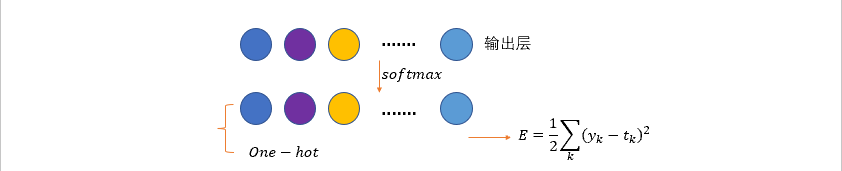

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 13 10:41:58 2022

@author: qingchenweifeng
"""
import numpy as np

def mean_squared_error(y,t):#均方差损失函数
    return (1/2)*np.sum((y-t)**2)

y=np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])#经softmax后的输出
t=np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])#one_hot
E=mean_squared_error(y, t)
print(E)

0.09750000000000003


### **4.2.2  交叉熵误差**

交叉熵主要用于多分类的问题中，如作为图神经网络**GCN**等损失函数

$$E=- \sum_{k}t_k log y_k $$

不同于均方差损失函数的是这里的$E$是单个样本的交叉熵损失       $\Uparrow$$\Uparrow$，损失函数$E$随着$y_k$的增大而减小

$$E_{sum} =-\sum \sum_{k}t_k log y_k $$

个体交叉熵的代码实现$\Rightarrow$

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 14 09:24:15 2022

@author: qingchenweifeng
"""
import numpy as np
def cross_entropy_error(y,t):
    delta_protect=1e-8#避免因为预测输出为0的情况下导致交叉熵无限大
    return -np.sum(t*np.log(y+delta_protect))

y=np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t=np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
print(cross_entropy_error(y, t))

0.5108256070993241


###  **4.2.3  mini-batch学习**

$mini-batch$是从成千上万个数据中抽取小批的数据进行学习

其中$N$份数据中每个数据的平均损失函数$E_{average}$$\Rightarrow$

$$ E_{average}=-\sum_{n} \sum_{k} {t_{nk}logy_{nk}}$$

其中$n$为第$n$个数据，$k$为第$n$个数据的第$k$个预测

从**MNIST**数据集中抽取10组数据$\Rightarrow$

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 14 15:06:17 2022

@author: qingchenweifeng
"""
import numpy as np
from mnist import load_mnist

(x_train,t_train),(x_test,t_test)=load_mnist(normalize=True,one_hot_label=True)
#读入mnist的数据
sum_size=x_train.shape[0]
mini_batch=10
batch_slice=np.random.choice(sum_size,mini_batch)#随机抽取10个
x_batch=x_train[batch_slice]
t_batch=t_train[batch_slice]#对应的数据

### **4.2.4 mini-batch版交叉熵函数的实现**

当$y$和$t$作为批数据或者单个数据输入交叉熵损失函数中$\Rightarrow$

In [1]:
import numpy as np
def cross_entropy_error(y,t):
    if y.ndim == 1:#若只输入一个数据则改变大小
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
    bathsize=y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/bathsize

或者抽出各个数据的正确解标签对应的神经网络$\Rightarrow$

In [ ]:
import numpy as np
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
    bathsize=y.shape[0]
    return -np,sum(np.log(y[np.arange(batchsize),t]+1e-7))/batchsize#y[np.arange(batchsize),t]是对应正确解的对应输出

### **4.2.5 为什么要设定损失函数**

为了优化神经网络中的参数，将**损失函数**为指标而不是**识别精度**<br>可以通过反向传播对损失函数求导，而且识别精度是不连续同时存在许多导数为0的地方$\rightarrow$识别精度对微小的变化不会有太大变化或者无变化

对于一个损失函数，我们可以对其中的参数$w$进行梯度下降:

$$ E(w_1,w_2...w_n)=argmin-\sum_{N}\sum_{q}t_{Nq}log y_{Nq}$$ $\Rightarrow$ $$W^{l+1}=W^{l}-\frac{\partial E}{\partial W^{l}}\times learningrate$$

### ***4.3 数值微分***

对于一个多元函数$w$其函数值下降最快的方向是**梯度方向**

### **4.3.1 导数**

导数的定义$\Rightarrow$

$$ \frac {df(x)}{dx} = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} $$

根据h$\rightarrow$0这一条件将h设置一个很小的数，即数值微分$\Rightarrow$

In [3]:
def numerical_diff(f,x):
    h=10e-50#h近似看为0
    return (f(x+h)-f(x))/h

h不能设置的过小，这样会造成**舍入误差**；同时数值微分的误差过大

In [4]:
def numerical_diff(f,x):
    h=1e-5#减小舍入误差
    return (f(x+h)-f(x-h))/2*h#将数值微分改为中心差分，减小误差

若想得到没有误差的导数，可以用数学的求导公式进行解析性求导$\Rightarrow$

$$ \frac{d(x^2)}{dx} =2x = numerical$$

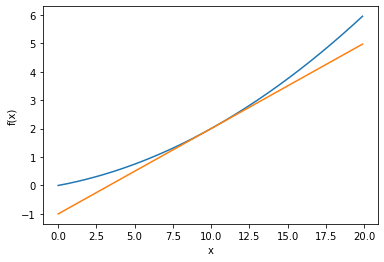

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 15 09:14:32 2022

@author: qingchenweifeng
"""
import numpy as np
import matplotlib.pylab as plt
def function_1(x):
    return 0.01*x**2+0.1*x
def numerial_diff(f,x):#把数值微分近似看为真实导数
    h=1e-5
    return(f(x+h)-f(x-h))/2*h
x1=np.arange(0,20,0.1)
y1=function_1(x1)
x2=np.arange(0,20,0.1)
y2=0.3*x2-1
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.show()

### **4.3.3偏导数**

$f(x_0,x_1)=x_{0}^{2}+x_{1}^{2}$的图像为$\Rightarrow$

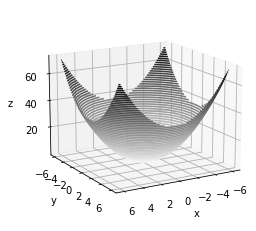

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 15 21:15:31 2022

@author: qingchenweifeng
"""

import matplotlib.pyplot as plt
import numpy as np
def f(x,y):
    return x**2+y**2
x = np.linspace(-6,6,30)
y = np.linspace(-6,6,30)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(15, 60)


$f(x)$在$(3,4)$处的两个偏导数(解析性求导)$\rightarrow$

$$ f(x_0,x_1)=x_{0}^{2}+x_{1}^{2}\rightarrow \frac{\partial f}{\partial x_0}=2 x_0+x_1^{2} $$

In [3]:
def function_1(x0,x1):#对x求偏导
    return 2*x1+x1**2
print(function_1(3,4))

24


In [4]:
def function_1(x0,x1):#对y求偏导
    return 2*x1+x0**2
print(function_1(3,4))

17


或者根据定义式$\rightarrow$ $$\frac{\partial f}{\partial x_{0}}= \frac{f(x_{1}+h,x_{2}(constant))-f(x_{1}-h,x_{2}(constant))}{2h}$$

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 18 13:40:28 2022

@author: qingchenweifeng
"""
def tempfunction(x0):#求f(x)对x0在(3,4)的偏导。先固定x1
    return x0**2+4.0**2
def numerical_diff(f,x):
    h=1e-5
    return (f(x+h)-f(x-h))/2*h
print(numerical_diff(tempfunction, 3.0))

6.000000000128125e-10


### **4.4 梯度**

**梯度(gradient)**是全部偏导构成的一个向量，是多元函数在某点处的数值变化最快的地方

$$ gard f(x_0,x_1)=(\frac{\partial f}{x_0} , \frac{\partial f}{x_1})$$

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 18 13:40:28 2022

@author: qingchenweifeng
"""
import numpy as np
def function(x):
    return x[0]**2+x[1]**2
def gradient(f,x):
    h=1e-4
    grad=np.zeros_like(x)#梯度分量和自变量的个数相同
    for i in range(x.size):
        tempvalue=x[i]#tempvalue是防止x元素的值改变
        x[i]=tempvalue+h#计算f(x+h)
        fxh1=f(x)
        
        x[i]=tempvalue-h#计算f(x-h)
        fxh2=f(x)
        
        grad[i]=(fxh1-fxh2)/(2*h)#每个循环计算一个自变量梯度
        x[i]=tempvalue#恢复x中对应元素的值
    return grad #循环结束后返回一个梯度列表
print(gradient(function, np.array([3.0, 0.0])))#f(x)在（3,0)的梯度

[6. 0.]


### **4.4.1  梯度法**

**梯度下降**是用于求解损失函数到达局部最小值时所得出的对应参数,每次梯度下降所对应的数理过程$\Rightarrow$

$$ x_0=x_0-\eta \frac{\partial f}{\partial x_0}$$<br>$$ x_1=x_1-\eta \frac{\partial f}{\partial x_1}$$

其中$\eta$为学习率$learningrate$或者步长

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 18 13:40:28 2022

@author: qingchenweifeng
"""
import numpy as np
def function(x):
    return x[0]**2+x[1]**2
def gradient(f,x):
    h=1e-4
    grad=np.zeros_like(x)#梯度分量和自变量的个数相同
    for i in range(x.size):
        tempvalue=x[i]#tempvalue是防止x元素的值改变
        x[i]=tempvalue+h#计算f(x+h)
        fxh1=f(x)
        
        x[i]=tempvalue-h#计算f(x-h)
        fxh2=f(x)
        
        grad[i]=(fxh1-fxh2)/(2*h)#每个循环计算一个自变量梯度
        x[i]=tempvalue#恢复x中对应元素的值
    return grad #循环结束后返回一个梯度列表
def gradient_desent(f,init_x,learningrate=0.01,step_num=100):#目标函数，初始下降点，学习率，学习次数
    x=init_x
    for i in range(step_num):
        grad=gradient(f, x)
        x=x-grad*learningrate
        return x
init_x=np.array([-3.0,4.0])#梯度下降初始点
print(gradient_desent(function, init_x=init_x,learningrate=0.1,step_num=100))

### **4.4.2 神经网络的梯度**

$$Loss=f(w_{1},w_{2}...w_{n}); W=\left({\begin{array}{cc} w_{11} & w_{12} \\
    w_{21} & w_{22} \\
  \end{array} }\right)\rightarrow \frac{\partial L}{\partial W}=\left({\begin{array}{cc} \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} \\
    \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} \\
  \end{array} }\right)$$

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 18 19:31:28 2022

@author: qingchenweifeng
"""
import numpy as np
from functions import softmax,cross_entropy_error#激活函数，损失函数
from gradient import numerical_gradient#梯度

class simplenet:#搭建了一个神经网络框架
    def __init__(self):
        self.W=np.arange(2,3)#使用高斯分布初始化
    def predict(self, x):
        return np.dot(x, self.W)#预测函数,x时输入数据
    def loss(self,x,t):#损失函数
        z=self.predict(x)
        y=softmax(z)
        loss=cross_entropy_error(y, t)#t是真实数据
        return loss

以上是定义了一个simplenet的类，其中包含了前向传播、计算损失，之后是包含推理部分$\Rightarrow$

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 18 19:31:28 2022

@author: qingchenweifeng
"""
import numpy as np
from functions import softmax,cross_entropy_error#激活函数，损失函数
from gradient import numerical_gradient#梯度

class simplenet:#搭建了一个神经网络框架
    def __init__(self):
        self.W=np.random.randn(2,3)#使用高斯分布初始化
    def predict(self, x):
        return np.dot(x, self.W)#预测函数,x时输入数据
    def loss(self,x,t):#损失函数
        z=self.predict(x)
        y=softmax(z)
        loss=cross_entropy_error(y, t)#t是真实数据
        return loss
#---------------------------------------------------------------------------------------------------------------------------------------------
net=simplenet()#实例化
x=np.array([0.6,0.9])#这是输入神经网络的数据
pre=net.predict(x)#进行预测，即向前推理
t=np.array([0,0,1])#定义正确标签的one-hot码
print(net.loss(x, t))#计算损失

和实际情况相同,$self.W$的初始权重是随机给出，最优的权重会在梯度下降的时候得到

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 18 19:31:28 2022

@author: qingchenweifeng
"""
import numpy as np
from functions import softmax,cross_entropy_error#激活函数，损失函数
from gradient import numerical_gradient#梯度

class simplenet:#搭建了一个神经网络框架
    def __init__(self):
        self.W=np.random.randn(2,3)#使用高斯分布初始化
    def predict(self, x):
        return np.dot(x, self.W)#预测函数,x时输入数据
    def loss(self,x,t):#损失函数
        z=self.predict(x)
        y=softmax(z)
        loss=cross_entropy_error(y, t)#t是真实数据
        return loss
#---------------------------------------------------------------------------------------------------------------------------------------------
net=simplenet()#实例化
x=np.array([0.6,0.9])#这是输入神经网络的数据
pre=net.predict(x)#进行预测，即向前推理
t=np.array([0,0,1])#定义正确标签的one-hot码
print(net.loss(x, t))#计算损失
#---------------------------------------------------------------------------------------------------------------------------------------------
def f(W):#梯度下降,定义f是为了更好地传参
    return net.loss(x, t)
print(numerical_gradient(f, net.W))

### **4.5 学习算法的实现**

随机梯度算法$(stochastic gradient descent)$$\rightarrow$收集数据，损失函数，计算梯度，梯度下降$\rightarrow$重复

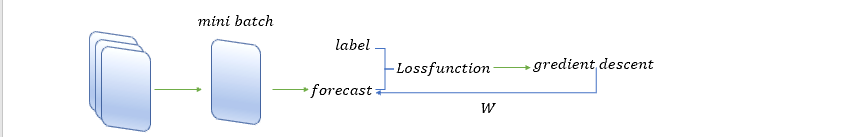

### **4.5.1 2层神经网络的类**

两层神经网络$(TwoLayerNet)$包含前向传播、计算损失和梯度、梯度下降、精度计算部分。这是框架的实现$\Rightarrow$

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 20 10:35:09 2022

@author: wangchen
"""
import numpy as np
from functions import * #高斯分布的随机数初始化
from functions import sigmoid#激活函数
from functions import softmax#输出层概率分配函数
from functions import cross_entropy_error#交叉熵损失
from gradient import numerical_gradient#导入数值梯度算法

class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
#=============================================================================================================================================
#生成TwoLayersNet时生成实例的方法（输入层个数，隐藏层个数，输出层个数，权重初始化）
        self.params={}
        self.params['W1']=weight_init_std * np.random.randn(input_size,hidden_size)#初始化权重,权重的大小与各自的输入输出大小有关
        self.params['b1']=np.zeros(hidden_size)#b1、b2的权重都初始为0
        self.params['W2']=weight_init_std * np.random.randn(hidden_size,output_size)
        self.params['b2']=np.zeros(output_size)
#这里的权重和偏置都是根据不同层而决定,这里的params字典存储了towlayersnet所有的初始权重和偏置
#=============================================================================================================================================
    def predict(self,x):#前向传播函数块,x是输入
        W1,W2=self.params['W1'],self.params['W2']
        b1,b2=self.params['b1'],self.params['b2']#将初始化的权重和偏置导入前向传播的模块当中
        a1=np.dot(x,W1)+b1
        z1=sigmoid(a1)
        a2=np.dot(z1,W2)+b2#两层，所以只到a2,这个过程是前向传播过程
        y=softmax(a2)
        return y
#=============================================================================================================================================
    def lossfunction(self,x,t):#x是输入数据，t是监督数据，这个模块是计算损失函数
        y=self.predict(x)#调用上面前向传播的过程
        return cross_entropy_error(y, t)#损失函数
#=============================================================================================================================================
    def accuracy(self,x,t):#计算精度,x是输入,t是监督数据,这里实现的是框架，所以监督数据暂定
        y=self.predict(x)#调用向前传播模块
        y=np.argmax(y,axis=1)#在第一个维度上寻找输出数据最大值
        t=np.argmax(t,axis=1)#在第一个维度上寻找监督数据的最大值
        accuracy=np.sum(y==t)/float(x.shape[0])#计算精度
        return accuracy
#=============================================================================================================================================
    def numerical_gradient(self,x,t):#计算数值梯度
        loss_w=lambda W:self.lossfunction(x,t)
        grads={}#这里的grad用于存储框架中权重和偏置的梯度
        grads['W1']=numerical_gradient(loss_w, self.params['W1'])
        grads['b1']=numerical_gradient(loss_w, self.params['b1'])
        grads['W2']=numerical_gradient(loss_w, self.params['W2'])
        grads['b2']=numerical_gradient(loss_w, self.params['b2'])
        return grads

### **4.5.2 mini-batch学习**

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 20 13:17:46 2022

@author: wangchen
"""
import numpy as np
from mnist import load_mnist#正规化数据集
from two_layer_net import TwoLayerNet#导入框架

(x_train,t_train),(x_test,t_test)=load_mnist(normalize=True,one_hot_label=True)
#正规化训练数据集，测试数据集以one-hot编码形式出现
#=============================================================================================================================================
#设置超参数->需要认为设定的参数
train_loss_list=[]#记录每次训练的损失
iters_num=10000#训练次数
train_size=x_train.shape[0]#训练数据的大小
batch_size=100#每次训练所抽取的样本数量
learning_rate=0.1#学习率
#=============================================================================================================================================
network=TwoLayerNet(input_size=784, hidden_size=50, output_size=10)#实例化TwolayerNet类
#784=28×28对应一副图像的大小，10对应的是0-9个数字
for i in range(iters_num):
    batch_mask=np.random.choice(train_size,batch_size)#从train_size选取batch_size个样本
    x_batch=x_train[batch_mask]#批抽取数据
    t_batch=t_train[batch_mask]#批抽取对应数据的监督数据
#=============================================================================================================================================
    grad=network.numerical_gradient(x_batch, t_batch)#在TwolayerNet中完成前向推理和计算梯度
#=============================================================================================================================================
#计算完梯度后便是梯度下降和迭代过程
    for key in ('W1','b1','W2','b2'):
        network.params[key]=network.params[key]-grad[key]*learning_rate#更新参数的过程
    loss=network.loss(x_batch, t_batch)#计算损失
    train_loss_list.append(loss)#加入损失字典中
#TwolayerNet中的param和grad都是存储权重和梯度的字典
#直到i==iters_num时才停止更新过程，这里更新了10000次
#=====================================================================================================================================        

### **4.5.3 基于测试数据的评价**

当神经网络对测试数据学习后，需要对训练后的神经网络进行评价，防止出现过拟合的现象(缺少泛化能力，即无法“适应”其他数据集)

判断一个训练后的神经网络是否过拟合$\Rightarrow$

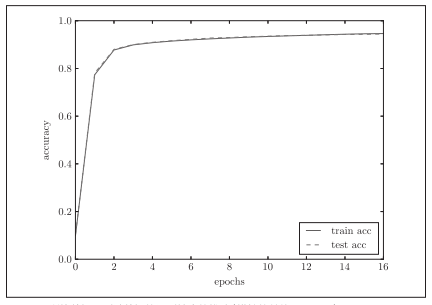

随着学习的前进，训练数据和测试数据的精度重合，则近似认为没有过拟合

实现评价数据的代码实现$\Rightarrow$

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 20 18:54:55 2022

@author: wangchen
"""
import numpy as np
from mnist import load_mnist#正规化数据集
from two_layer_net import TwoLayerNet#导入框架

(x_train,t_train),(x_test,t_test)=load_mnist(normalize=True,one_hot_label=True)
#正规化训练数据集，测试数据集以one-hot编码形式出现
#=============================================================================================================================================
#设置超参数->需要认为设定的参数
train_loss_list=[]#记录每次训练的损失
train_accuracy_list=[]#存储训练精度的列表
test_accuracy_list=[]#存储训练精度的列表
iters_num=10000#训练次数
train_size=x_train.shape[0]#训练数据的大小
batch_size=100#每次训练所抽取的样本数量
learning_rate=0.1#学习率
iter_per_epoch=max(train_size/batch_size,1)#平均每个epoch的重复次数
#=============================================================================================================================================
network=TwoLayerNet(input_size=784, hidden_size=50, output_size=10)#实例化TwolayerNet类
#784=28×28对应一副图像的大小，10对应的是0-9个数字
for i in range(iters_num):
    batch_mask=np.random.choice(train_size,batch_size)#从train_size选取batch_size个样本
    x_batch=x_train[batch_mask]#批抽取数据
    t_batch=t_train[batch_mask]#批抽取对应数据的监督数据
#=============================================================================================================================================
    grad=network.numerical_gradient(x_batch, t_batch)#在TwolayerNet中完成前向推理和计算梯度
#=============================================================================================================================================
#计算完梯度后便是梯度下降和迭代过程
    for key in ('W1','b1','W2','b2'):
        network.params[key]=network.params[key]-grad[key]*learning_rate#更新参数的过程
    loss=network.loss(x_batch, t_batch)#计算损失
    train_loss_list.append(loss)#加入损失字典中
    if i%iter_per_epoch==0:#i是平均epoch重复次数的倍数
        train_accuracy=network.accuracy(x_train, t_train)#训练数据的精度
        test_accuracy=network.accuracy(x_test, t_test)#测试数据的精度
        train_accuracy_list.append(train_accuracy)
        test_accuracy_list.append(test_accuracy)
        print("train accurecy,test accuracy |"+str(train_accuracy)+","+str(test_accuracy))
#TwolayerNet中的param和grad都是存储权重和梯度的字典
#直到i==iters_num时才停止更新过程，这里更新了10000次
#=====================================================================================================================================        

### **4.6 小结**

• 机器学习中使用的数据集分为**训练数据**和**测试数据**，先训练数据后测试。<br>
• 神经网络用训练数据进行学习，并用测试数据评价学习到的模型的**泛化能力**。<br>
• 神经网络的学习以损失函数为指标，更新权重参数，以使损失函数的值减小。像训练次数、样本大小、学习率等**超参数**需要认为预先制定。<br>
• 利用某个给定的微小值的差分求导数的过程，称为数值微分。**中心差分**的误差相对较小。<br>
• 利用**数值微分**，可以计算权重参数的梯度。twolayersnet中的grad字典变量能存储所有偏置和权重的梯度。